In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score

# Data Preprocessing

In [4]:
dataset = pd.read_csv('../Datasets/RTA Dataset.csv')

In [5]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## 1.) Numeric Features

In [6]:
dataset_cont = dataset[['Number_of_vehicles_involved' ,'Number_of_casualties', 'Accident_severity']]
cont_features = dataset_cont.columns

In [7]:
cont_features

Index(['Number_of_vehicles_involved', 'Number_of_casualties',
       'Accident_severity'],
      dtype='object')

### 1.1) Number of Vehicles

In [8]:
dataset_cont['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

In [9]:
dataset_cont['Number_of_vehicles_involved'].isnull().sum()

0

In [10]:
dataset_cont['Number_of_vehicles_involved'].describe()

count    12316.000000
mean         2.040679
std          0.688790
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: Number_of_vehicles_involved, dtype: float64

### 1.2) Number of casualties

In [11]:
dataset_cont['Number_of_casualties'].describe()

count    12316.000000
mean         1.548149
std          1.007179
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Number_of_casualties, dtype: float64

In [12]:
dataset_cont['Number_of_casualties'].isnull().sum()

0

## 2.) Missing Values

In [13]:
missingValues = pd.DataFrame(dataset.isnull().sum()).reset_index().rename(columns={'Index': 'Feature', 0:'Missing Count'}).sort_values(by=['Missing Count'], ascending=False)

In [14]:
missingValues

,index,Missing Count
10,Defect_of_vehicle,4427
9,Service_year_of_vehicle,3928
27,Work_of_casuality,3198
28,Fitness_of_casuality,2635
7,Type_of_vehicle,950
14,Types_of_Junction,887
6,Driving_experience,829
4,Educational_level,741
5,Vehicle_driver_relation,579
8,Owner_of_vehicle,482


In [15]:
non_null_Dataframe = missingValues.tail(16)

In [16]:
non_null_Dataframe

,index,Missing Count
23,Casualty_class,0
29,Pedestrian_movement,0
30,Cause_of_accident,0
26,Casualty_severity,0
25,Age_band_of_casualty,0
24,Sex_of_casualty,0
0,Time,0
16,Road_surface_conditions,0
21,Number_of_casualties,0
20,Number_of_vehicles_involved,0


In [17]:
non_null_features = list(non_null_Dataframe['index'])

In [18]:
non_null_features

['Casualty_class',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Casualty_severity',
 'Age_band_of_casualty',
 'Sex_of_casualty',
 'Time',
 'Road_surface_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Weather_conditions',
 'Light_conditions',
 'Day_of_week',
 'Sex_of_driver',
 'Age_band_of_driver',
 'Accident_severity']

## 3.) Creating Training Dataframe

In [19]:
trainingDataframe = dataset[non_null_features]

In [20]:
trainingDataframe.head()

,Casualty_class,Pedestrian_movement,Cause_of_accident,Casualty_severity,Age_band_of_casualty,Sex_of_casualty,Time,Road_surface_conditions,Number_of_casualties,Number_of_vehicles_involved,Weather_conditions,Light_conditions,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,na,Not a Pedestrian,Moving Backward,na,na,na,17:02:00,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Slight Injury
1,na,Not a Pedestrian,Overtaking,na,na,na,17:02:00,Dry,2,2,Normal,Daylight,Monday,Male,31-50,Slight Injury
2,Driver or rider,Not a Pedestrian,Changing lane to the left,3,31-50,Male,17:02:00,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Serious Injury
3,Pedestrian,Not a Pedestrian,Changing lane to the right,3,18-30,Female,1:06:00,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury
4,na,Not a Pedestrian,Overtaking,na,na,na,1:06:00,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury


In [21]:
def getHour(time):
  value = datetime.strptime(time, '%H:%M:%S')
  return value.hour

In [22]:
trainingDataframe['Time'] = trainingDataframe['Time'].apply(getHour)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [23]:
trainingDataframe.head()

,Casualty_class,Pedestrian_movement,Cause_of_accident,Casualty_severity,Age_band_of_casualty,Sex_of_casualty,Time,Road_surface_conditions,Number_of_casualties,Number_of_vehicles_involved,Weather_conditions,Light_conditions,Day_of_week,Sex_of_driver,Age_band_of_driver,Accident_severity
0,na,Not a Pedestrian,Moving Backward,na,na,na,17,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Slight Injury
1,na,Not a Pedestrian,Overtaking,na,na,na,17,Dry,2,2,Normal,Daylight,Monday,Male,31-50,Slight Injury
2,Driver or rider,Not a Pedestrian,Changing lane to the left,3,31-50,Male,17,Dry,2,2,Normal,Daylight,Monday,Male,18-30,Serious Injury
3,Pedestrian,Not a Pedestrian,Changing lane to the right,3,18-30,Female,1,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury
4,na,Not a Pedestrian,Overtaking,na,na,na,1,Dry,2,2,Normal,Darkness - lights lit,Sunday,Male,18-30,Slight Injury


In [24]:
def makeDummies(feature):
  globals() ['{}'.format(feature)] = pd.get_dummies(trainingDataframe[feature])

In [25]:
for feature in non_null_features:
  makeDummies(feature)

In [26]:
non_null_features

['Casualty_class',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Casualty_severity',
 'Age_band_of_casualty',
 'Sex_of_casualty',
 'Time',
 'Road_surface_conditions',
 'Number_of_casualties',
 'Number_of_vehicles_involved',
 'Weather_conditions',
 'Light_conditions',
 'Day_of_week',
 'Sex_of_driver',
 'Age_band_of_driver',
 'Accident_severity']

In [27]:
LabeledDataFrame = pd.concat([Casualty_class,
 Pedestrian_movement,
 Cause_of_accident,
 Casualty_severity,
 Age_band_of_casualty,
 Sex_of_casualty,
 Time,
 Road_surface_conditions,
 Number_of_casualties,
 Number_of_vehicles_involved,
 Weather_conditions,
 Light_conditions,
 Day_of_week,
 Sex_of_driver,
 Age_band_of_driver,
 Accident_severity], axis=1)

In [28]:
LabeledDataFrame.head()

,Driver or rider,Passenger,Pedestrian,na,Crossing from driver's nearside,Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle,Crossing from offside - masked by parked or statioNot a Pedestrianry vehicle,"In carriageway, statioNot a Pedestrianry - not crossing (standing or playing)","In carriageway, statioNot a Pedestrianry - not crossing (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle",Not a Pedestrian,...,Male,Unknown,18-30,31-50,Over 51,Under 18,Unknown,Fatal injury,Serious Injury,Slight Injury
0,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [29]:
LabeledDataFrame.shape

(12316, 119)

## 4.) Defining useful methods for preprocessing

In [30]:
features_with_low_accuracy = list()

In [31]:
def getNullIndexes(feature):
  null_indexes = dataset[pd.isna(dataset[feature])].index
  return null_indexes

In [32]:
def get_X_Y(null_indexes, feature):
  X = LabeledDataFrame.drop(null_indexes)
  y = dataset.drop(null_indexes)[feature]
  return X,y

In [33]:
def prepareModel(X_train, X_test, y_train, y_test):
  gbc = GradientBoostingClassifier()
  gbc.fit(X_train,y_train)
  print('Accuracy on Training Data: ',accuracy_score(y_train, gbc.predict(X_train)))
  print('Accuracy on Training Data: ',accuracy_score(y_test, gbc.predict(X_test)))
  if accuracy_score(y_test, gbc.predict(X_test)) < .5 : features_with_low_accuracy.append(feature)
  return gbc

In [34]:
def get_missing_predictions(gbc, null_indexes, feature):
  predictions = gbc.predict(LabeledDataFrame.iloc[null_indexes])
  predicted = pd.DataFrame(predictions, columns=[feature], index=null_indexes)
  return predicted

In [35]:
def impute(fromDataset, feature, null_indexes):
  for i in null_indexes:
    dataset[feature][i] = fromDataset[feature][i]

## 5.) Imputing missing values

In [36]:
def ImputeScript(feature):
  print('For feature: {}'.format(feature))
  dof_null_indexes = getNullIndexes(feature)
  X_dof, y_dof = get_X_Y(dof_null_indexes, feature)
  X_train, X_test, y_train, y_test = train_test_split(X_dof, y_dof, test_size=.3, random_state=101)
  gbc = prepareModel(X_train, X_test, y_train, y_test)
  predictedDataframe = get_missing_predictions(gbc, dof_null_indexes, feature)
  impute(predictedDataframe, feature, dof_null_indexes)
  print()
  print()

In [37]:
missingValues

,index,Missing Count
10,Defect_of_vehicle,4427
9,Service_year_of_vehicle,3928
27,Work_of_casuality,3198
28,Fitness_of_casuality,2635
7,Type_of_vehicle,950
14,Types_of_Junction,887
6,Driving_experience,829
4,Educational_level,741
5,Vehicle_driver_relation,579
8,Owner_of_vehicle,482


In [38]:
feature_with_missing_values = list(missingValues.head(16)['index'])

In [39]:
feature_with_missing_values

['Defect_of_vehicle',
 'Service_year_of_vehicle',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Type_of_vehicle',
 'Types_of_Junction',
 'Driving_experience',
 'Educational_level',
 'Vehicle_driver_relation',
 'Owner_of_vehicle',
 'Lanes_or_Medians',
 'Vehicle_movement',
 'Area_accident_occured',
 'Road_surface_type',
 'Type_of_collision',
 'Road_allignment']

In [40]:
dataset[feature_with_missing_values].isnull().sum()

Defect_of_vehicle          4427
Service_year_of_vehicle    3928
Work_of_casuality          3198
Fitness_of_casuality       2635
Type_of_vehicle             950
Types_of_Junction           887
Driving_experience          829
Educational_level           741
Vehicle_driver_relation     579
Owner_of_vehicle            482
Lanes_or_Medians            385
Vehicle_movement            308
Area_accident_occured       239
Road_surface_type           172
Type_of_collision           155
Road_allignment             142
dtype: int64

In [41]:
for feature in feature_with_missing_values:
  ImputeScript(feature)

For feature: Defect_of_vehicle


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.9900398406374502
Accuracy on Training Data:  0.9805661174482467


For feature: Service_year_of_vehicle


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.41338783852835975
Accuracy on Training Data:  0.33094954310687325


For feature: Work_of_casuality


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.6626449388906299
Accuracy on Training Data:  0.6476608187134503


For feature: Fitness_of_casuality


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.9964580873671782
Accuracy on Training Data:  0.9910499139414802


For feature: Type_of_vehicle


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.3755656108597285
Accuracy on Training Data:  0.2565982404692082


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_16536/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S



For feature: Types_of_Junction


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.529375
Accuracy on Training Data:  0.4520268299795859


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_16536/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]




For feature: Driving_experience


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.37475124378109453
Accuracy on Training Data:  0.2703800406150276


For feature: Educational_level


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.6760059244630955
Accuracy on Training Data:  0.6395047509357904


For feature: Vehicle_driver_relation


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.8221545952525867
Accuracy on Training Data:  0.8256672345258376


For feature: Owner_of_vehicle


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.8845828805988168
Accuracy on Training Data:  0.8865108420163335


For feature: Lanes_or_Medians


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names th

Accuracy on Training Data:  0.4537181175907077
Accuracy on Training Data:  0.3452513966480447


For feature: Vehicle_movement


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.7011302795954789
Accuracy on Training Data:  0.665556480710519


For feature: Area_accident_occured


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_16536/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\

Accuracy on Training Data:  0.4275405181592334
Accuracy on Training Data:  0.2977373068432671


For feature: Road_surface_type


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_16536/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\

Accuracy on Training Data:  0.937764705882353
Accuracy on Training Data:  0.9239846322722283


For feature: Type_of_collision


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy on Training Data:  0.7342575187969925
Accuracy on Training Data:  0.7201973143326938


For feature: Road_allignment


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_16536/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]
C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\

Accuracy on Training Data:  0.8721980988146931
Accuracy on Training Data:  0.8543662742950999




C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_16536/2841034354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature][i] = fromDataset[feature][i]


In [42]:
features_with_low_accuracy

['Service_year_of_vehicle',
 'Type_of_vehicle',
 'Types_of_Junction',
 'Driving_experience',
 'Lanes_or_Medians',
 'Area_accident_occured']

In [43]:
dataset[feature_with_missing_values].isnull().sum()

Defect_of_vehicle          0
Service_year_of_vehicle    0
Work_of_casuality          0
Fitness_of_casuality       0
Type_of_vehicle            0
Types_of_Junction          0
Driving_experience         0
Educational_level          0
Vehicle_driver_relation    0
Owner_of_vehicle           0
Lanes_or_Medians           0
Vehicle_movement           0
Area_accident_occured      0
Road_surface_type          0
Type_of_collision          0
Road_allignment            0
dtype: int64

In [44]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [45]:
dataset['Time'] = dataset['Time'].apply(getHour)

In [46]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


## 6.) Finding Correlation between features

In [47]:
import scipy.stats as ss
from sklearn.feature_selection import chi2

In [48]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [49]:
correlationMatrix = list()

In [50]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [51]:
for fromfeature in dataset.columns:
  correlationList = list()
  for toFeature in dataset.columns:
    correlation = cramers_v(dataset[fromfeature], dataset[toFeature])
    correlationList.append(correlation)
  correlationMatrix.append(correlationList) 

In [52]:
correlationDataFrame = pd.DataFrame(correlationMatrix, columns=dataset.columns, index=dataset.columns)

<AxesSubplot:>

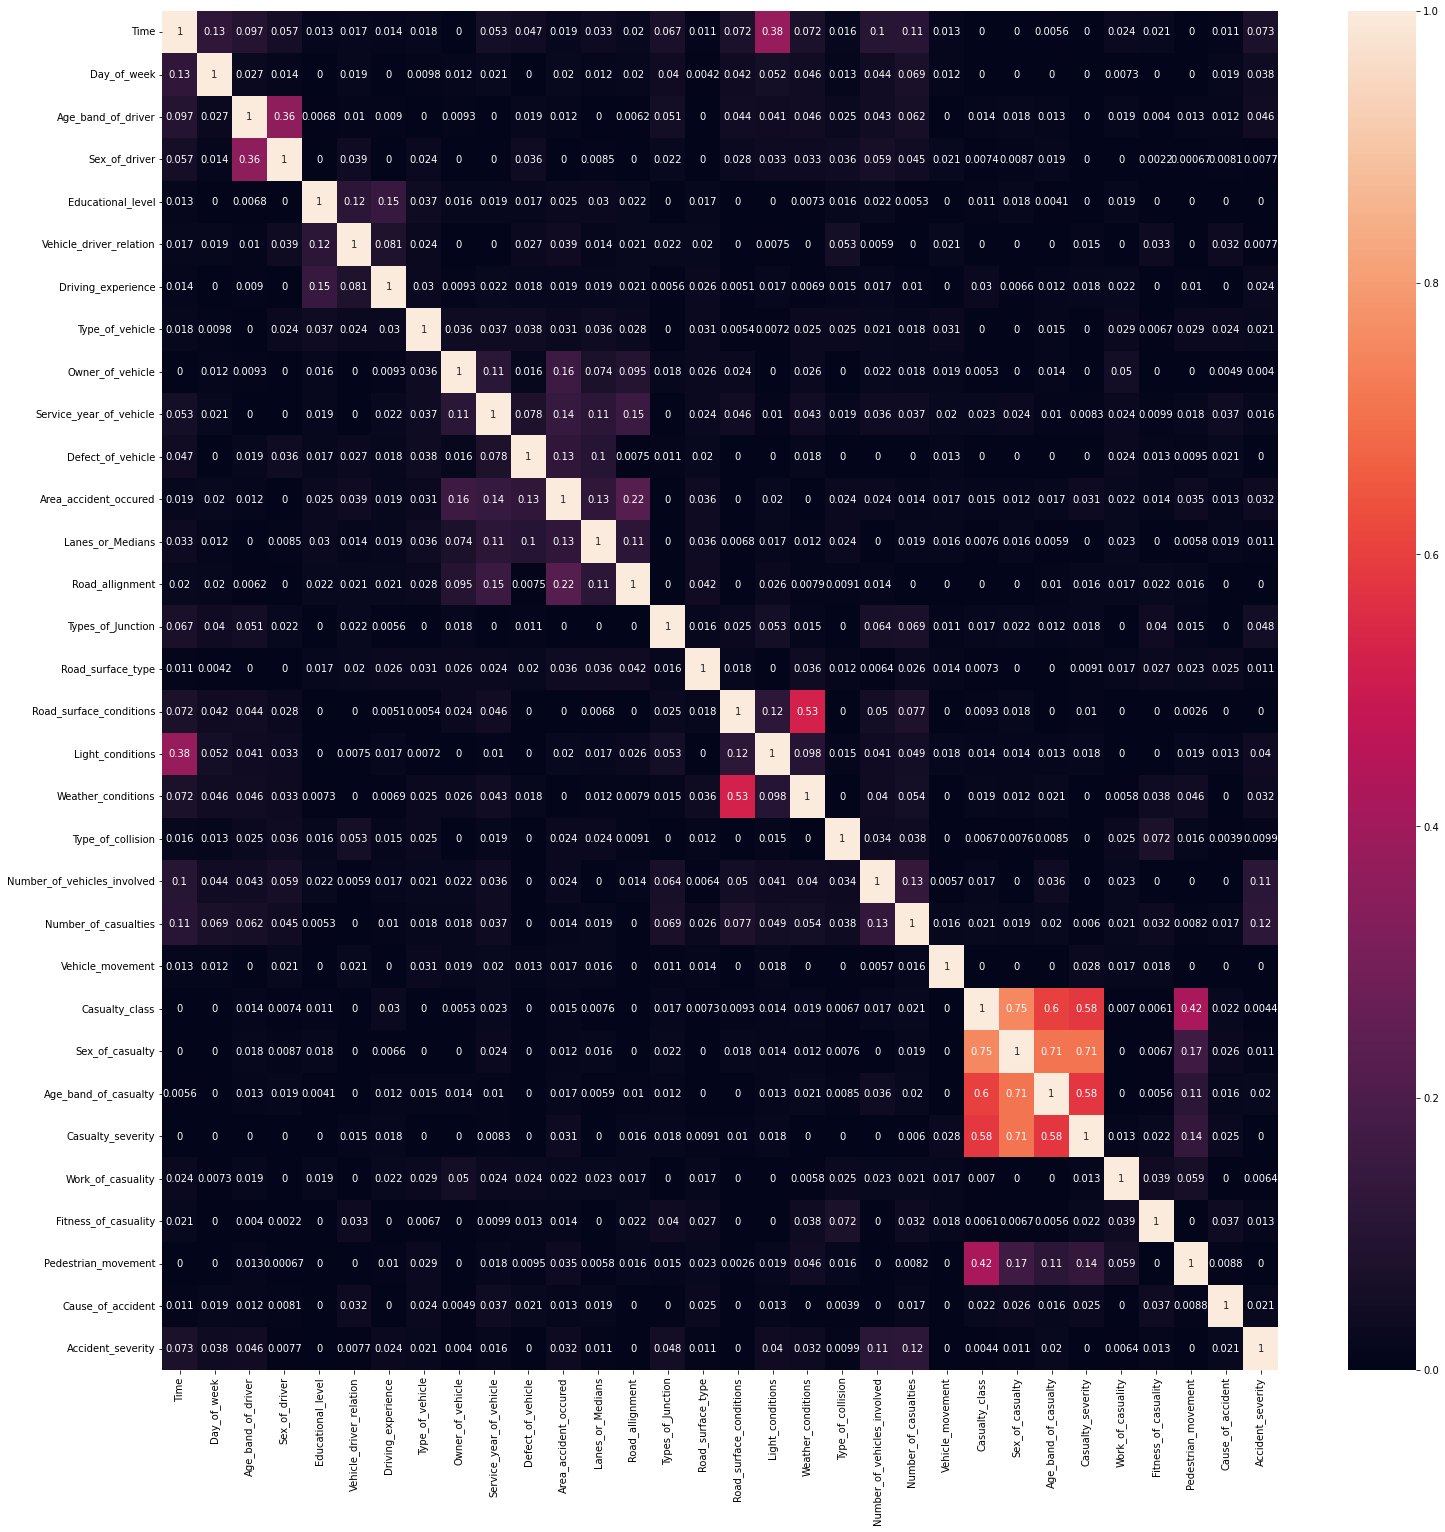

In [53]:
plt.figure(figsize=(25,25))
sns.heatmap(correlationDataFrame, annot=True)

## 7.) Features Selection

In [54]:
features_with_low_accuracy

['Service_year_of_vehicle',
 'Type_of_vehicle',
 'Types_of_Junction',
 'Driving_experience',
 'Lanes_or_Medians',
 'Area_accident_occured']

In [55]:
features_to_remove = ['Casualty_class', 'Sex_of_casualty', 'Casualty_severity']

In [56]:
dataset = dataset.drop(features_to_remove, axis=1)

# Model Creation

###  Evaluating baseline model

In [110]:
modelsDict = dict()

In [58]:
X = dataset.drop('Accident_severity', axis=1)

In [59]:
X.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,Driver,Normal,Not a Pedestrian,Moving Backward
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Driver,Normal,Not a Pedestrian,Overtaking
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Normal,Collision with roadside objects,2,2,Going straight,31-50,Driver,Normal,Not a Pedestrian,Changing lane to the left
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Normal,Vehicle with vehicle collision,2,2,Going straight,18-30,Driver,Normal,Not a Pedestrian,Changing lane to the right
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Normal,Vehicle with vehicle collision,2,2,Going straight,na,Driver,Normal,Not a Pedestrian,Overtaking


In [60]:
X = pd.get_dummies(X)

In [61]:
X.head()

,Time,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,17,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
y = dataset['Accident_severity']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [84]:
from xgboost import XGBClassifier

In [111]:
def buildModel(X_train, X_test, y_train, y_test, modelVersion):
  clf = XGBClassifier()
  clf.fit(X_train,y_train)
  train_predictions = clf.predict(X_train)
  test_predictions = clf.predict(X_test)



  print('Classification Report: ', classification_report(y_test, test_predictions))
  print('Confusion Matrix: ', confusion_matrix(y_test, test_predictions))

  train_accuracy = accuracy_score(y_train, clf.predict(X_train))
  train_precision = precision_score(y_train, clf.predict(X_train), average=None)
  train_recall = recall_score(y_train, clf.predict(X_train), average=None)
  train_f1Score = f1_score(y_train, clf.predict(X_train), average = None)

  test_accuracy = accuracy_score(y_test, clf.predict(X_test))
  test_precision = precision_score(y_test, clf.predict(X_test), average=None)
  test_recall = recall_score(y_test, clf.predict(X_test), average=None)
  test_f1Score = f1_score(y_test, clf.predict(X_test), average=None)

  
  modelDict = {
    'Training Data':{
      'accuracy' : train_accuracy,
      'precision' : train_precision,
      'recall' : train_recall,
      'F1 score' : train_f1Score
    },

    'Test Data' :{
      'accuracy' : test_accuracy,
      'precision' : test_precision,
      'recall' : test_recall,
      'F1 score' : test_f1Score
    }
  }

  modelsDict[modelVersion] = modelDict

In [88]:
buildModel(X_train, X_test, y_train, y_test, 'Initial Model')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                  precision    recall  f1-score   support

  Fatal injury       0.77      0.19      0.30        54
Serious Injury       0.54      0.09      0.15       509
 Slight Injury       0.86      0.99      0.92      3132

      accuracy                           0.85      3695
     macro avg       0.72      0.42      0.46      3695
  weighted avg       0.81      0.85      0.80      3695

Confusion Matrix:  [[  10    1   43]
 [   1   45  463]
 [   2   37 3093]]


## 8.) Handeling Data Imbalance

### 8.1) Random under-sampling with imblearn

In [112]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [113]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({'Slight Injury': 10415, 'Serious Injury': 1743, 'Fatal injury': 158})
Resample dataset shape Counter({'Fatal injury': 158, 'Serious Injury': 158, 'Slight Injury': 158})


In [114]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=.3, random_state=101)

In [115]:
buildModel(X_train_rus, X_test_rus, y_train_rus, y_test_rus, 'Random Under Sampling')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                  precision    recall  f1-score   support

  Fatal injury       0.67      0.57      0.62        49
Serious Injury       0.46      0.38      0.41        56
 Slight Injury       0.35      0.50      0.41        38

      accuracy                           0.48       143
     macro avg       0.49      0.48      0.48       143
  weighted avg       0.50      0.48      0.48       143

Confusion Matrix:  [[28 10 11]
 [10 21 25]
 [ 4 15 19]]


### 8.2) Random over-sampling with imblearn

In [116]:
from imblearn.over_sampling import RandomOverSampler

In [117]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X,y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'Slight Injury': 10415, 'Serious Injury': 1743, 'Fatal injury': 158})
Resample dataset shape Counter({'Slight Injury': 10415, 'Serious Injury': 10415, 'Fatal injury': 10415})


In [118]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=.3, random_state=101)

In [119]:
buildModel(X_train_ros, X_test_ros, y_train_ros, y_test_ros, 'Random Over Sampling')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                  precision    recall  f1-score   support

  Fatal injury       0.99      1.00      1.00      3135
Serious Injury       0.82      0.89      0.86      3112
 Slight Injury       0.88      0.80      0.84      3127

      accuracy                           0.90      9374
     macro avg       0.90      0.90      0.90      9374
  weighted avg       0.90      0.90      0.90      9374

Confusion Matrix:  [[3135    0    0]
 [   0 2782  330]
 [  29  610 2488]]


### 8.3) Using SMOTETomek

In [120]:
from imblearn.combine import SMOTETomek

In [121]:
dataset['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [122]:
sm = SMOTETomek()

In [123]:
X_Smote, y_Smote = sm._fit_resample(X, y)

In [124]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_Smote, y_Smote, test_size=.3, random_state=101)

In [125]:
buildModel(X_train_smote, X_test_smote, y_train_smote, y_test_smote, 'SMOTETomek')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                  precision    recall  f1-score   support

  Fatal injury       0.99      0.99      0.99      3143
Serious Injury       0.98      0.86      0.91      3087
 Slight Injury       0.87      0.98      0.92      3135

      accuracy                           0.94      9365
     macro avg       0.95      0.94      0.94      9365
  weighted avg       0.95      0.94      0.94      9365

Confusion Matrix:  [[3118    0   25]
 [  26 2641  420]
 [   1   60 3074]]


### 8.4) NearMiss

In [126]:
from imblearn.under_sampling import NearMiss

In [127]:
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({'Slight Injury': 10415, 'Serious Injury': 1743, 'Fatal injury': 158})
Resample dataset shape: Counter({'Fatal injury': 158, 'Serious Injury': 158, 'Slight Injury': 158})


In [128]:
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm, test_size=.3, random_state=101)

In [129]:
buildModel(X_train_nm, X_test_nm, y_train_nm, y_test_nm, 'Near Miss')

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:                  precision    recall  f1-score   support

  Fatal injury       0.71      0.82      0.76        49
Serious Injury       0.71      0.43      0.53        56
 Slight Injury       0.49      0.68      0.57        38

      accuracy                           0.63       143
     macro avg       0.64      0.64      0.62       143
  weighted avg       0.65      0.63      0.62       143

Confusion Matrix:  [[40  4  5]
 [10 24 22]
 [ 6  6 26]]


### Conclusion
##### SMOTETomek gives the best results

In [134]:
modelsDict['SMOTETomek']

{'Training Data': {'accuracy': 0.9783981693363845,
  'precision': array([0.99520154, 0.99927146, 0.94384505]),
  'recall': array([0.99821232, 0.93778203, 0.99944942]),
  'F1 score': array([0.99670465, 0.96755079, 0.97085172])},
 'Test Data': {'accuracy': 0.9431927389215163,
  'precision': array([0.99141494, 0.97778601, 0.87354362]),
  'recall': array([0.99204582, 0.85552316, 0.98054226]),
  'F1 score': array([0.99173028, 0.91257775, 0.92395552])}}

## 9.) Hyper-parameters Tuning

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [139]:
cv = KFold(n_splits=5, random_state=101, shuffle=True)

In [140]:
xgb_clf = XGBClassifier()

In [143]:
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [147]:
paramsDict = {
  'n_estimators' : [100],
  'max_depth' : [5,11],
  'criterion' : ['gini']
  }

In [148]:
grid_search = GridSearchCV(xgb_clf, param_grid=paramsDict, cv=cv, scoring='f1')

In [150]:
grid_search.fit(X_train_smote, y_train_smote)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[14:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[14:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[14:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[14:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[15:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[15:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[15:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[15:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[15:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:01:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return

[15:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                      

In [151]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

In [152]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.538514,0.483008,0.029576,0.003432,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'n_estim...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,18.308254,1.333816,0.041567,0.008683,gini,11,100,"{'criterion': 'gini', 'max_depth': 11, 'n_esti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [153]:
best_params = {'criterion': ['gini'], 'max_depth':[5], 'n_estimators': [100]}


In [154]:
grid_search_best = GridSearchCV(xgb_clf, param_grid=best_params, cv=cv)

In [155]:
grid_search_best.fit(X_train_smote, y_train_smote)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:06:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                      

In [158]:
predictions_xgb_smoteTomek_train = grid_search_best.predict(X_train_smote)

In [159]:
predictions_xgb_smoteTomek_test = grid_search_best.predict(X_test_smote)

In [162]:
print('On Train Data', classification_report(y_train_smote, predictions_xgb_smoteTomek_train))

On Train Data                 precision    recall  f1-score   support

  Fatal injury       0.99      0.99      0.99      7272
Serious Injury       1.00      0.90      0.94      7313
 Slight Injury       0.91      1.00      0.95      7265

      accuracy                           0.96     21850
     macro avg       0.96      0.96      0.96     21850
  weighted avg       0.96      0.96      0.96     21850



In [163]:
print('On Test Data', classification_report(y_test_smote, predictions_xgb_smoteTomek_test))

On Test Data                 precision    recall  f1-score   support

  Fatal injury       0.98      0.99      0.99      3143
Serious Injury       0.98      0.84      0.91      3087
 Slight Injury       0.87      0.98      0.92      3135

      accuracy                           0.94      9365
     macro avg       0.94      0.94      0.94      9365
  weighted avg       0.94      0.94      0.94      9365



# 3.) Making predictions by prepared model

In [171]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Collision with roadside-parked vehicles,2,2,Going straight,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Vehicle with vehicle collision,2,2,Going straight,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Collision with roadside objects,2,2,Going straight,31-50,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Vehicle with vehicle collision,2,2,Going straight,18-30,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Vehicle with vehicle collision,2,2,Going straight,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [198]:
def makePredictions(X):
  predictions = grid_search_best.predict(X)
  return predictions

In [263]:
randomNumber = np.random.randint(0, X.shape[0]+1)
testData = X.iloc[randomNumber]
actual_value = y[randomNumber]
predicted_value = makePredictions([testData])[0]

print('Actual Value: ', actual_value)
print('Predicted Value: ', predicted_value)

Actual Value:  Slight Injury
Predicted Value:  Slight Injury
